In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Задание 1

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Daniel1871/wb-tech-school-hw2/refs/heads/main/experiment_lesson_4.csv") # залил на гит к домашке этот датасет для удобства
df.sample(5)

,order_id,delivery_time,district,experiment_group
3883,6967,42.0,Purlieus,control
9429,3030,56.0,Purlieus,control
3201,2379,44.0,Purlieus,control
10861,20109,41.0,Purlieus,test
3189,10914,37.0,Purlieus,control


### Посмотрим на данные с которыми работаем:

In [3]:
df.shape

(20196, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


In [5]:
df.isnull().sum()

,0
order_id,0
delivery_time,0
district,0
experiment_group,0



Пропусков в данных нет.

In [6]:
df['delivery_time'].describe()

,delivery_time
count,20196.000000
mean,42.054169
std,10.382196
min,10.000000
25%,35.000000
50%,42.000000
75%,49.000000
max,83.000000


In [7]:
df.describe(include=['object'])

,district,experiment_group
count,20196,20196
unique,3,2
top,Purlieus,test
freq,16960,10104


In [8]:
df['experiment_group'].value_counts()

,count
experiment_group,
test,10104
control,10092


### Гистограмма распределения времени доставки

In [9]:
df_control = df['delivery_time'][df['experiment_group'] == 'control']
df_test = df['delivery_time'][df['experiment_group'] == 'test']

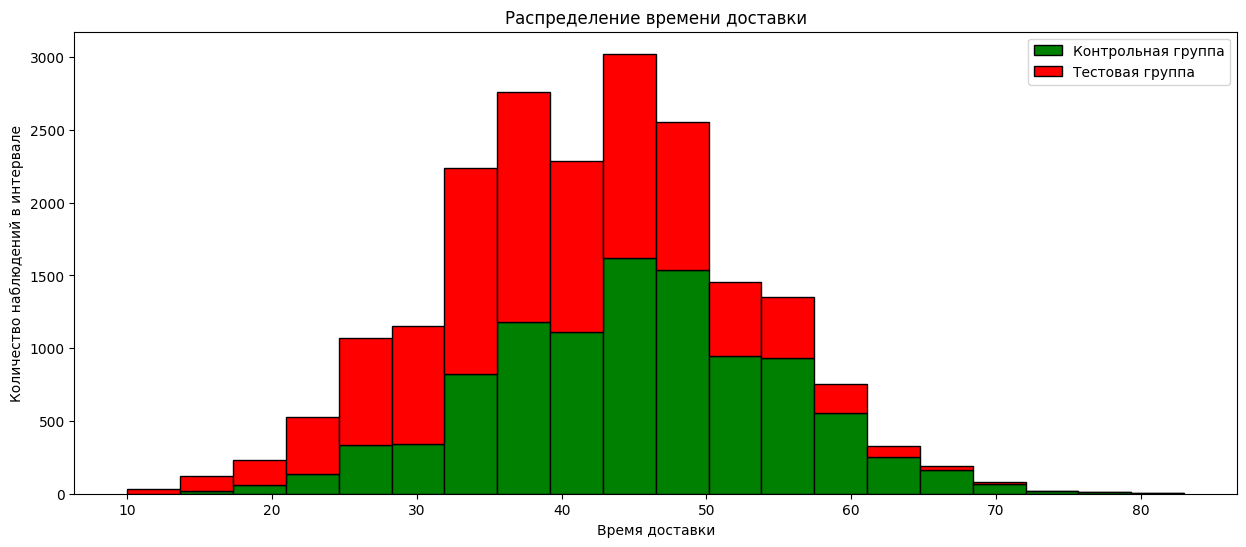

In [10]:
plt.figure(figsize=(15, 6))
plt.hist([df_control, df_test], bins=20, color=['green', 'red'], stacked=True, edgecolor='black', label=['Контрольная группа', 'Тестовая группа'])
plt.legend()
plt.title('Распределение времени доставки')
plt.xlabel('Время доставки')
plt.ylabel('Количество наблюдений в интервале')
plt.show()

Для ответа на вопросы удобнее было бы посмотреть отдельно.

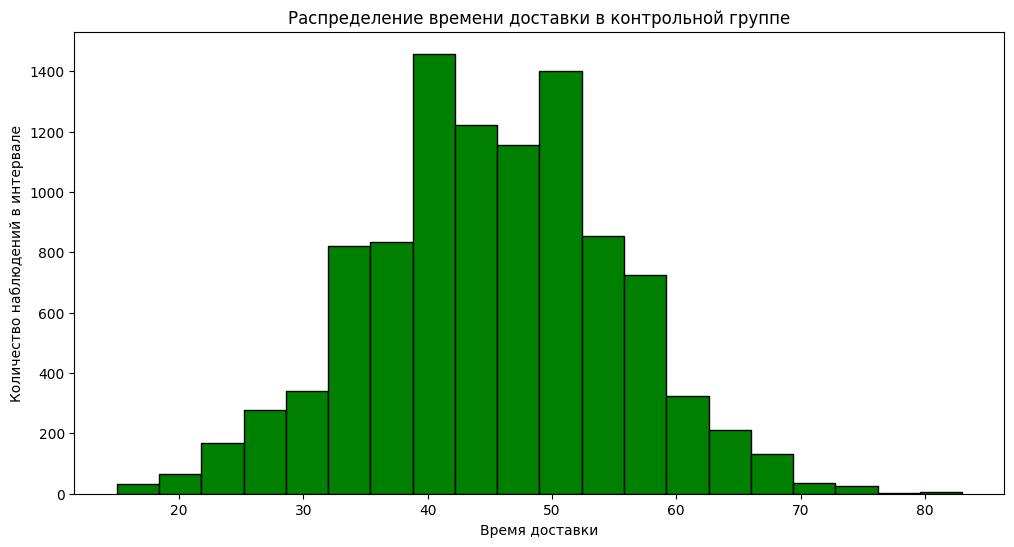

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(df_control, bins=20, color='green', edgecolor='black')
plt.title('Распределение времени доставки в контрольной группе')
plt.xlabel('Время доставки')
plt.ylabel('Количество наблюдений в интервале')
plt.show()

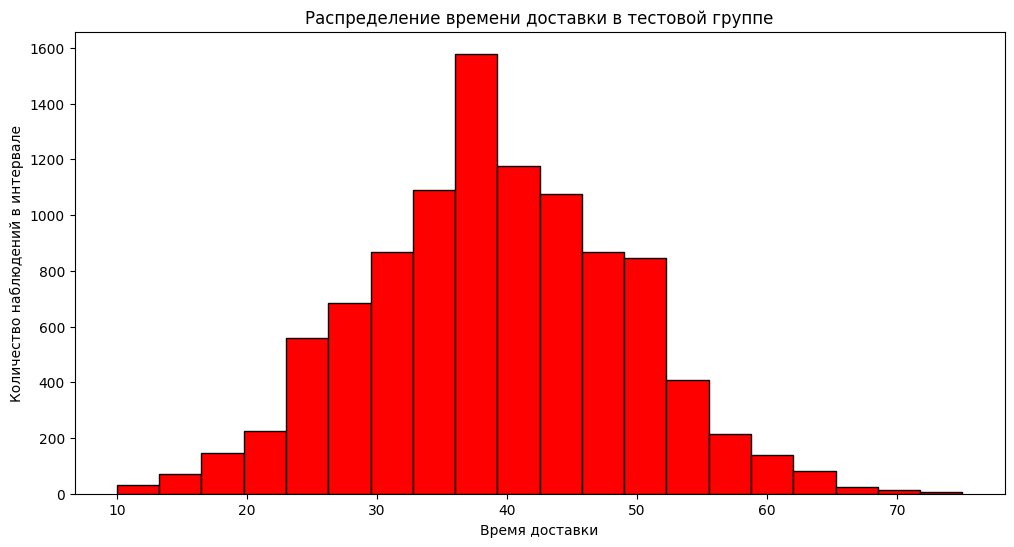

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df_test, bins=20, color='red', edgecolor='black')
plt.title('Распределение времени доставки в тестовой группе')
plt.xlabel('Время доставки')
plt.ylabel('Количество наблюдений в интервале')
plt.show()

### Количество наблюдений в тестовой и контрольной группе

In [13]:
print(f'Количество наблюдений в контрольной группе = {len(df_control)}')
print(f'Количество наблюдений в тестовой группе = {len(df_test)}')
print(f'Разница = {abs(len(df_control) - len(df_test))}')

Количество наблюдений в контрольной группе = 10092
Количество наблюдений в тестовой группе = 10104
Разница = 12


### Нормальность

Раз в подсказке сказано считать, игнорируя NaN'ы, то так и будем делать, но вообще говоря, выше мы убедились, что в наших данных отсутствуют пропуски.

In [14]:
_, pvalue = stats.normaltest(df_control, nan_policy='omit')
print(f'p-value для контрольной группы = {round(pvalue, 2)}')

_, pvalue = stats.normaltest(df_test, nan_policy='omit')
print(f'p-value для тестовой группы = {round(pvalue, 4)}')

p-value для контрольной группы = 0.88
p-value для тестовой группы = 0.0298


На уровне значимости 0.05 гипотеза о нормальности распределения данных в контрольной группе не отвергается (p-value = 0.88 > 0.05)

На уровне значимости 0.05 гипотеза о нормальности распределения данных в тестовой группе отвергается (p-value = 0.298 < 0.05)

### Стандартное отклонение

In [15]:
print(f'Стандартное отклонение контрольной группы = {round(df_control.std(), 2)}')
print(f'Стандартное отклонение тестовой группы = {round(df_test.std(), 2)}')

Стандартное отклонение контрольной группы = 9.99
Стандартное отклонение тестовой группы = 9.88


### Статистика t-критерия

In [16]:
stat, pvalue = stats.ttest_ind(df_test, df_control)
print(f'Значение статистики t-критерия = {round(stat)}')

Значение статистики t-критерия = -43


### Сравнение средних

In [17]:
diff = (df_test.mean() - df_control.mean()) / df_control.mean() * 100
print(f'Среднее время доставки в тестовой группе по сравнению с контрольной изменилось на {round(diff, 2)}%')

Среднее время доставки в тестовой группе по сравнению с контрольной изменилось на -13.35%


# Задание 2

Резюмируем действия прошлого номера: мы поняли, что распределение времени доставки в контрольной группе нормальное; а в тестовой - нет, но мы работаем с объем выборки > 10000, также на графике распределения времени мы не наблюдали ярко выраженной ассиметрии. Так что для проверки гипотезы о равенстве средних в контрольной группе и тестовой мы используем критерий Стьюдента (t-test) для независимых выборок.

Нулевая и альтернативные гипотезы:

$H_0$: $μ_{test} = μ_{control}$ \\
$H_a$: $μ_{test} < μ_{control}$

где $μ_{test}$ и $μ_{control}$ - мат. ожидания случайных величин, описывающих распределение наблюдений в тестовой и контрольной выборках соответственно

Посмотрим на pvalue с прошлого номера (получили при расчете статистики критерия):

In [18]:
pvalue / 2 # односторонняя крит. область => делим на 2

0.0

**Вывод в научном формате**:

На уровне значимости $0.05$ гипотеза $H_0$ отвергается (p-value $= 0 < 0.05$) в пользу $H_a$ о том, что среднее время доставки в тесте (то есть с опцией "по пути") меньше, чем в контроле (без этой опции). Более того, мы даже посчитали, что среднее время доставки с фичей на 13% меньше, чем без нее.

Только что поняли, что гипотеза $H_0$ отверглась на уровне значимости $0.05$. Сделаем **вывод, понятный человеку, который не является специалистом в статистике**: разница между средними при использовании опции "по пути" и без нее статистически значима. Опять же можем даже украсить наш ответ, сказав, что среднее время доставки с фичей на 13% меньше, чем без нее.